In [22]:
import numpy as  np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm  import SVC
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import cv2

In [3]:
df = fetch_openml("mnist_784" , parser="auto")    # format 

In [4]:
x = df.data 
y = df.target

In [5]:
x          # columns = (28 px * 28 px )  image_size   

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y        # real value 


0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

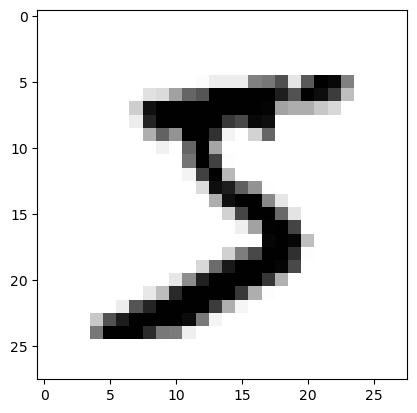

In [7]:
plt.imshow(x.values[0].reshape(28,28) ,cmap="binary")   # first image

In [8]:
y[0]

'5'

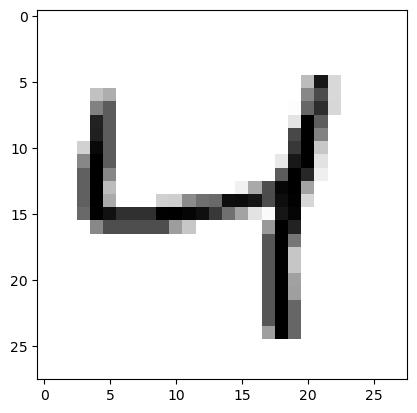

In [9]:
plt.imshow(x.values[2].reshape(28,28) ,cmap="binary")     # default colors (yellow ,purple)

In [10]:
x_train , x_test ,y_train , y_test = train_test_split(x,y,test_size= 0.2,random_state=42)

In [11]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)    # scalling is important for gradient descent which used in logistic regression 
# scalling make it faster 

In [14]:
model = LogisticRegression(max_iter=1000)
model.fit(x_scaled,y_train) 
model.score(x_scaled,y_train)

0.9455892857142857

In [15]:
model.score(x_test,y_test)

c:\Users\Skytop\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.8336428571428571

Note : the model is overfit

In [16]:
model = KNeighborsClassifier()
model.fit(x_scaled,y_train) 
model.score(x_scaled,y_train)
model.score(x_test,y_test)

c:\Users\Skytop\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.8185714285714286

In [18]:
model = DecisionTreeClassifier()
model.fit(x_scaled,y_train) 
print(model.score(x_scaled,y_train))
print(model.score(x_test,y_test))

1.0
0.15478571428571428


c:\Users\Skytop\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [20]:
model = RandomForestClassifier()
model.fit(x_scaled,y_train) 
print(model.score(x_scaled,y_train))
print(model.score(x_test,y_test))

1.0


c:\Users\Skytop\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.224
